In [95]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import time
from scipy.io import wavfile
from scipy import signal
import cv2
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time
from catboost import CatBoostClassifier

### Submission 1

In [2]:
#считывание файла
df = pd.read_csv(r'C:\Users\skills\Downloads\Модуль 3\training_datasets\train_data.csv.')
df

,feature_1,feature_2,feature_3,label
0,1.750988e+04,-0.681507,0.750701,5
1,2.336432e+05,-0.584831,0.680264,5
2,3.160232e+07,-0.325012,0.299842,4
3,2.069916e+03,-0.533113,0.112504,2
4,1.653934e+09,0.224607,0.023237,3
...,...,...,...,...
2395,3.458215e+06,0.259271,-0.006309,2
2396,1.961786e+02,-0.024546,1.990460,5
2397,2.287323e+03,1.026482,-0.752980,5
2398,4.747754e+05,-0.184145,0.705360,5


In [3]:
# копия для проверки Nan значений
df_copy = df.dropna()
df_copy

,feature_1,feature_2,feature_3,label
0,1.750988e+04,-0.681507,0.750701,5
1,2.336432e+05,-0.584831,0.680264,5
2,3.160232e+07,-0.325012,0.299842,4
3,2.069916e+03,-0.533113,0.112504,2
4,1.653934e+09,0.224607,0.023237,3
...,...,...,...,...
2395,3.458215e+06,0.259271,-0.006309,2
2396,1.961786e+02,-0.024546,1.990460,5
2397,2.287323e+03,1.026482,-0.752980,5
2398,4.747754e+05,-0.184145,0.705360,5


<Axes: >

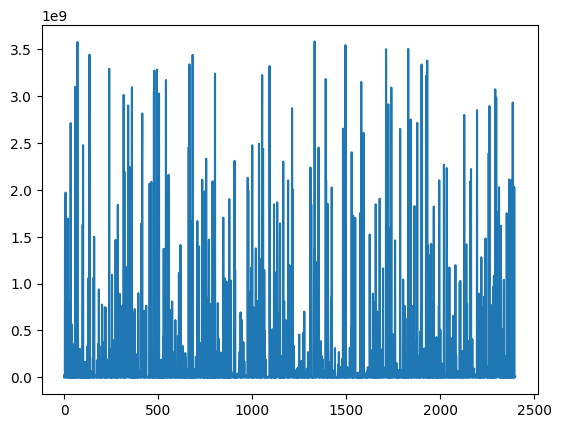

In [4]:
df['feature_1'].plot()

<Axes: >

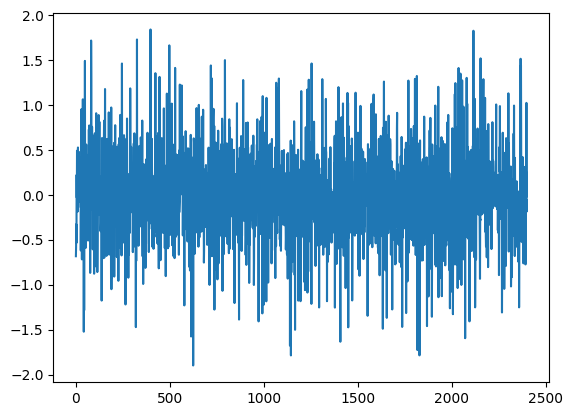

In [5]:
df['feature_2'].plot()

<Axes: >

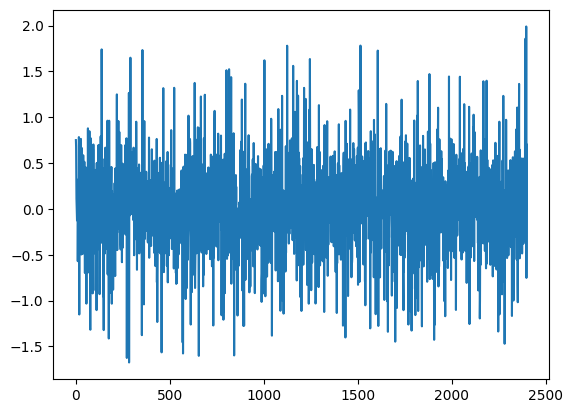

In [6]:
df['feature_3'].plot()

In [7]:
X = df.drop('label', axis = 1)
X

,feature_1,feature_2,feature_3
0,1.750988e+04,-0.681507,0.750701
1,2.336432e+05,-0.584831,0.680264
2,3.160232e+07,-0.325012,0.299842
3,2.069916e+03,-0.533113,0.112504
4,1.653934e+09,0.224607,0.023237
...,...,...,...
2395,3.458215e+06,0.259271,-0.006309
2396,1.961786e+02,-0.024546,1.990460
2397,2.287323e+03,1.026482,-0.752980
2398,4.747754e+05,-0.184145,0.705360


In [8]:
y = df['label']
y

0       5
1       5
2       4
3       2
4       3
       ..
2395    2
2396    5
2397    5
2398    5
2399    0
Name: label, Length: 2400, dtype: int64

In [9]:
# Нормализация данных
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [10]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [11]:
from catboost import CatBoostClassifier

# Инициализация моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier()
}

# Обучение моделей и оценка точности
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {accuracy:.2f}')

Accuracy of Logistic Regression: 0.23
Accuracy of Random Forest: 0.78
Accuracy of Support Vector Machine: 0.47
Accuracy of Decision Tree: 0.76
Accuracy of Naive Bayes: 0.46
Accuracy of K-Nearest Neighbors: 0.47
Accuracy of MLP Classifier: 0.51
Accuracy of Gradient Boosting: 0.71
Learning rate set to 0.081803
0:	learn: 1.7108009	total: 148ms	remaining: 2m 27s
1:	learn: 1.6545332	total: 151ms	remaining: 1m 15s
2:	learn: 1.5949618	total: 154ms	remaining: 51.2s
3:	learn: 1.5447410	total: 157ms	remaining: 39.2s
4:	learn: 1.5115160	total: 160ms	remaining: 31.9s
5:	learn: 1.4702785	total: 164ms	remaining: 27.1s
6:	learn: 1.4331470	total: 167ms	remaining: 23.6s
7:	learn: 1.4021394	total: 170ms	remaining: 21.1s
8:	learn: 1.3688901	total: 173ms	remaining: 19s
9:	learn: 1.3346599	total: 176ms	remaining: 17.4s
10:	learn: 1.3103021	total: 179ms	remaining: 16.1s
11:	learn: 1.2884034	total: 182ms	remaining: 15s
12:	learn: 1.2670487	total: 185ms	remaining: 14.1s
13:	learn: 1.2431239	total: 188ms	remai

In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

accuracy = 0
i = 0
lr = 0
d = 0
for iterations in range (100, 1001, 100):
    for learning_rate in range (1, 11):
        for depth in range (2, 7):
            model = CatBoostClassifier(iterations = iterations, depth = depth, learning_rate = learning_rate/100,  verbose = False)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy_1 = accuracy_score(y_test, y_pred)
            if accuracy_1>accuracy:
                accuracy = accuracy_1
                i = iterations
                lr = learning_rate/100
                d = depth
print(f'Accuracy={accuracy}')
print(f'Iterations = {i}, Depth = {d}, Learning_rate = {lr}')


Accuracy=0.9041666666666667
Iterations = 1000, Depth = 5, Learning_rate = 0.1


In [16]:
model = CatBoostClassifier(iterations = 1000, depth = 5, learning_rate = 0.1)

In [17]:
model.fit(X_train, y_train)

0:	learn: 1.7138612	total: 2.52ms	remaining: 2.52s
1:	learn: 1.6395909	total: 4.77ms	remaining: 2.38s
2:	learn: 1.5794323	total: 7.04ms	remaining: 2.34s
3:	learn: 1.5226645	total: 9.6ms	remaining: 2.39s
4:	learn: 1.4731859	total: 12.4ms	remaining: 2.47s
5:	learn: 1.4445191	total: 15.7ms	remaining: 2.61s
6:	learn: 1.4194598	total: 18.1ms	remaining: 2.56s
7:	learn: 1.3886719	total: 20.6ms	remaining: 2.56s
8:	learn: 1.3557113	total: 23.1ms	remaining: 2.54s
9:	learn: 1.3260091	total: 25.1ms	remaining: 2.48s
10:	learn: 1.3003235	total: 27ms	remaining: 2.43s
11:	learn: 1.2747097	total: 29.3ms	remaining: 2.41s
12:	learn: 1.2571414	total: 31.3ms	remaining: 2.37s
13:	learn: 1.2377056	total: 33.2ms	remaining: 2.34s
14:	learn: 1.2179820	total: 35.1ms	remaining: 2.31s
15:	learn: 1.2010425	total: 37.1ms	remaining: 2.28s
16:	learn: 1.1864340	total: 39ms	remaining: 2.25s
17:	learn: 1.1717402	total: 40.9ms	remaining: 2.23s
18:	learn: 1.1655473	total: 42.8ms	remaining: 2.21s
19:	learn: 1.1516987	total:

In [18]:
test_x = pd.read_csv(r'C:\Users\skills\Downloads\Модуль 3\training_datasets\test_data.csv.')
test_x

,feature_1,feature_2,feature_3
0,2.408623e+06,-0.037081,-0.053878
1,4.646117e+05,0.528252,-0.373263
2,3.173518e+06,-0.684187,0.227111
3,1.461246e+06,-0.740289,-0.008230
4,1.062981e+04,1.042804,-0.367080
...,...,...,...
795,2.404058e+04,0.056652,1.070450
796,4.951244e+03,0.013956,1.162048
797,4.133495e+08,-0.165703,0.478250
798,1.244435e+06,-0.563804,0.199910


In [19]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(test_x)

In [21]:
y_pred = model.predict(X_normalized)
y_pred

array([[0],
       [2],
       [5],
       [2],
       [4],
       [3],
       [3],
       [2],
       [2],
       [2],
       [1],
       [0],
       [4],
       [5],
       [2],
       [2],
       [4],
       [1],
       [3],
       [2],
       [0],
       [1],
       [5],
       [2],
       [1],
       [4],
       [3],
       [4],
       [3],
       [4],
       [5],
       [2],
       [2],
       [5],
       [1],
       [3],
       [5],
       [3],
       [2],
       [2],
       [3],
       [0],
       [3],
       [3],
       [1],
       [2],
       [2],
       [3],
       [1],
       [2],
       [1],
       [4],
       [3],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [1],
       [5],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [5],
       [4],
       [1],
       [0],
       [1],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [4],
       [3],
       [1],
       [3],
       [2],
    

In [22]:
y_df = pd.DataFrame(y_pred)
y_df

,0
0,0
1,2
2,5
3,2
4,4
...,...
795,4
796,4
797,5
798,2


In [24]:
y_df.to_csv('M3_submission1_Adamova_Aleksandra.csv', index=False, header=False)

### Submission 2

In [25]:
#считывание файла
df = pd.read_csv(r'C:\Users\skills\Downloads\Модуль 3\training_datasets\train_shapes.csv.')
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,5/31/2005 01:20,doncaster (south yorkshire) (uk/england),NaN,gb,unknown,600,10 minutes,Bright red light hovering and taking off,6/20/2005,53.533333,-1.116667
1,11/10/2002 05:32,southfield,mi,us,other,5,5 secs? more or less,I HAVE NEVER HEARD A SOUND LIKE THIS COMING FR...,11/16/2002,42.473333,-83.221944
2,12/25/2009 00:30,seabrook,tx,us,unknown,5,5 seconds,A rather large yellow laser beam tracked from ...,2/14/2010,29.563889,-95.025278
3,12/16/1985 19:00,vallejo,ca,us,triangle,0,30,A shaped object with amber/organge lights&#44 ...,10/30/2006,38.104167,-122.255556
4,9/30/2005 18:28,coral springs,fl,us,disk,60.0,1 minute,SHIP BY THE SUN TOOK A PICTURE IN AMAZEMENT,10/11/2005,26.270833,-80.270833
...,...,...,...,...,...,...,...,...,...,...,...
62070,11/14/1997 21:10,snohomish,wa,us,formation,10,10 seconds,Large object seen traveling northeast at a slo...,1/28/1999,47.913056,-122.096944
62071,9/30/2000 20:00,globe,az,us,circle,30.0,15-30 sec.,Object was brillant green &#44marble shaped &...,12/2/2000,33.394167,-110.785833
62072,11/24/2013 18:26,lake stevens,wa,us,changing,30,30 seconds,Odd multishaped Orange Orbs Seen Over Western ...,12/2/2013,48.015278,-122.062500
62073,3/18/2014 03:00,berwyn,il,us,light,15,10-15 seconds,BRIGHT RED/ORANGE LIKE LIGHT CONSUMED ENTIRE L...,3/18/2014,41.850556,-87.793611


In [26]:
# копия для проверки Nan значений
df_copy = df.dropna()
df_copy

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,11/10/2002 05:32,southfield,mi,us,other,5,5 secs? more or less,I HAVE NEVER HEARD A SOUND LIKE THIS COMING FR...,11/16/2002,42.473333,-83.221944
2,12/25/2009 00:30,seabrook,tx,us,unknown,5,5 seconds,A rather large yellow laser beam tracked from ...,2/14/2010,29.563889,-95.025278
3,12/16/1985 19:00,vallejo,ca,us,triangle,0,30,A shaped object with amber/organge lights&#44 ...,10/30/2006,38.104167,-122.255556
4,9/30/2005 18:28,coral springs,fl,us,disk,60.0,1 minute,SHIP BY THE SUN TOOK A PICTURE IN AMAZEMENT,10/11/2005,26.270833,-80.270833
5,10/29/2011 23:00,foxborough,ma,us,flash,2,seconds,Unidentified Green flashing Light During Blizzard,12/12/2011,42.065278,-71.248333
...,...,...,...,...,...,...,...,...,...,...,...
62070,11/14/1997 21:10,snohomish,wa,us,formation,10,10 seconds,Large object seen traveling northeast at a slo...,1/28/1999,47.913056,-122.096944
62071,9/30/2000 20:00,globe,az,us,circle,30.0,15-30 sec.,Object was brillant green &#44marble shaped &...,12/2/2000,33.394167,-110.785833
62072,11/24/2013 18:26,lake stevens,wa,us,changing,30,30 seconds,Odd multishaped Orange Orbs Seen Over Western ...,12/2/2013,48.015278,-122.062500
62073,3/18/2014 03:00,berwyn,il,us,light,15,10-15 seconds,BRIGHT RED/ORANGE LIKE LIGHT CONSUMED ENTIRE L...,3/18/2014,41.850556,-87.793611


Удалим столбцы duration (hours/min), date posted и comments сразу, т.к один содержит дублирование информации, а другие не несут инф-ии для категоризации

In [27]:
df = df.drop(['duration (hours/min)', 'comments', 'date posted'], axis = 1)
df

,datetime,city,state,country,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,doncaster (south yorkshire) (uk/england),NaN,gb,unknown,600,53.533333,-1.116667
1,11/10/2002 05:32,southfield,mi,us,other,5,42.473333,-83.221944
2,12/25/2009 00:30,seabrook,tx,us,unknown,5,29.563889,-95.025278
3,12/16/1985 19:00,vallejo,ca,us,triangle,0,38.104167,-122.255556
4,9/30/2005 18:28,coral springs,fl,us,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...,...,...,...
62070,11/14/1997 21:10,snohomish,wa,us,formation,10,47.913056,-122.096944
62071,9/30/2000 20:00,globe,az,us,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,lake stevens,wa,us,changing,30,48.015278,-122.062500
62073,3/18/2014 03:00,berwyn,il,us,light,15,41.850556,-87.793611


Широта/Долгота также позволяют однозначно идентифицировать точку на карте, поэтому информация о населенном пункте также является избыточной. Избавляемся также от нее 

In [28]:
df = df.drop(['city', 'state', 'country'], axis = 1)
df

,datetime,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,unknown,600,53.533333,-1.116667
1,11/10/2002 05:32,other,5,42.473333,-83.221944
2,12/25/2009 00:30,unknown,5,29.563889,-95.025278
3,12/16/1985 19:00,triangle,0,38.104167,-122.255556
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10,47.913056,-122.096944
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,changing,30,48.015278,-122.062500
62073,3/18/2014 03:00,light,15,41.850556,-87.793611


In [29]:
# копия для проверки Nan значений
df_copy = df.dropna()
df_copy

,datetime,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,unknown,600,53.533333,-1.116667
1,11/10/2002 05:32,other,5,42.473333,-83.221944
2,12/25/2009 00:30,unknown,5,29.563889,-95.025278
3,12/16/1985 19:00,triangle,0,38.104167,-122.255556
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10,47.913056,-122.096944
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,changing,30,48.015278,-122.062500
62073,3/18/2014 03:00,light,15,41.850556,-87.793611


Зачистка избыточных столбцов позволила сократить значения Nan в ценных столбцах. Удалим из датафрейма все строки, где есть значения Nan (невозможно однозначно справиться определением недостающего)

In [30]:
df = df.dropna()
df

,datetime,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,unknown,600,53.533333,-1.116667
1,11/10/2002 05:32,other,5,42.473333,-83.221944
2,12/25/2009 00:30,unknown,5,29.563889,-95.025278
3,12/16/1985 19:00,triangle,0,38.104167,-122.255556
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10,47.913056,-122.096944
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,changing,30,48.015278,-122.062500
62073,3/18/2014 03:00,light,15,41.850556,-87.793611


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60040 entries, 0 to 62074
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            60040 non-null  object 
 1   shape               60040 non-null  object 
 2   duration (seconds)  60040 non-null  object 
 3   latitude            60040 non-null  float64
 4   longitude           60040 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.7+ MB


In [32]:
df['duration (seconds)'].replace(',', '.', inplace=True)
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

C:\Users\skills\AppData\Local\Temp\ipykernel_10108\3138607317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration (seconds)'].replace(',', '.', inplace=True)
C:\Users\skills\AppData\Local\Temp\ipykernel_10108\3138607317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration (seconds)'].replace(',', '.', inplace=True)
C:\

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60040 entries, 0 to 62074
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            60040 non-null  object 
 1   shape               60040 non-null  object 
 2   duration (seconds)  60040 non-null  float64
 3   latitude            60040 non-null  float64
 4   longitude           60040 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.7+ MB


In [34]:
df

,datetime,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,unknown,600.0,53.533333,-1.116667
1,11/10/2002 05:32,other,5.0,42.473333,-83.221944
2,12/25/2009 00:30,unknown,5.0,29.563889,-95.025278
3,12/16/1985 19:00,triangle,0.0,38.104167,-122.255556
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10.0,47.913056,-122.096944
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,changing,30.0,48.015278,-122.062500
62073,3/18/2014 03:00,light,15.0,41.850556,-87.793611


In [40]:
df

,datetime,shape,duration (seconds),latitude,longitude
0,5/31/2005 01:20,unknown,600.0,53.533333,-1.116667
1,11/10/2002 05:32,other,5.0,42.473333,-83.221944
2,12/25/2009 00:30,unknown,5.0,29.563889,-95.025278
3,12/16/1985 19:00,triangle,0.0,38.104167,-122.255556
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833
...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10.0,47.913056,-122.096944
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833
62072,11/24/2013 18:26,changing,30.0,48.015278,-122.062500
62073,3/18/2014 03:00,light,15.0,41.850556,-87.793611


In [42]:
import pandas as pd

# Преобразование строки в дату с указанием формата
df['date'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors = 'coerce')

# Преобразование даты в числовое представление (timestamp)
df['timestamp'] = df['date'].astype('int64') // 10**9  # Получаем количество секунд

df

C:\Users\skills\AppData\Local\Temp\ipykernel_10108\1889084888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M', errors = 'coerce')
C:\Users\skills\AppData\Local\Temp\ipykernel_10108\1889084888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['date'].astype('int64') // 10**9  # Получаем количество секунд


,datetime,shape,duration (seconds),latitude,longitude,date,timestamp
0,5/31/2005 01:20,unknown,600.0,53.533333,-1.116667,2005-05-31 01:20:00,1117502400
1,11/10/2002 05:32,other,5.0,42.473333,-83.221944,2002-11-10 05:32:00,1036906320
2,12/25/2009 00:30,unknown,5.0,29.563889,-95.025278,2009-12-25 00:30:00,1261701000
3,12/16/1985 19:00,triangle,0.0,38.104167,-122.255556,1985-12-16 19:00:00,503607600
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833,2005-09-30 18:28:00,1128104880
...,...,...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10.0,47.913056,-122.096944,1997-11-14 21:10:00,879541800
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833,2000-09-30 20:00:00,970344000
62072,11/24/2013 18:26,changing,30.0,48.015278,-122.062500,2013-11-24 18:26:00,1385317560
62073,3/18/2014 03:00,light,15.0,41.850556,-87.793611,2014-03-18 03:00:00,1395111600


In [43]:
df.dropna()

,datetime,shape,duration (seconds),latitude,longitude,date,timestamp
0,5/31/2005 01:20,unknown,600.0,53.533333,-1.116667,2005-05-31 01:20:00,1117502400
1,11/10/2002 05:32,other,5.0,42.473333,-83.221944,2002-11-10 05:32:00,1036906320
2,12/25/2009 00:30,unknown,5.0,29.563889,-95.025278,2009-12-25 00:30:00,1261701000
3,12/16/1985 19:00,triangle,0.0,38.104167,-122.255556,1985-12-16 19:00:00,503607600
4,9/30/2005 18:28,disk,60.0,26.270833,-80.270833,2005-09-30 18:28:00,1128104880
...,...,...,...,...,...,...,...
62070,11/14/1997 21:10,formation,10.0,47.913056,-122.096944,1997-11-14 21:10:00,879541800
62071,9/30/2000 20:00,circle,30.0,33.394167,-110.785833,2000-09-30 20:00:00,970344000
62072,11/24/2013 18:26,changing,30.0,48.015278,-122.062500,2013-11-24 18:26:00,1385317560
62073,3/18/2014 03:00,light,15.0,41.850556,-87.793611,2014-03-18 03:00:00,1395111600


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Преобразование целевой переменной shape в числовой формат
label_encoder = LabelEncoder()
df['shape_encoded'] = label_encoder.fit_transform(df['shape'])

# Подготовка X и y
X = df[['duration (seconds)', 'latitude', 'longitude', 'timestamp']]
y = df['shape_encoded']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\skills\AppData\Local\Temp\ipykernel_10108\2454323789.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shape_encoded'] = label_encoder.fit_transform(df['shape'])


In [73]:
# Обучение CatBoost
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=5, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)

# Обучение Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Вычисление F1-метрики
catboost_f1 = f1_score(y_test, catboost_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Обратное преобразование
catboost_shape_predictions = label_encoder.inverse_transform(catboost_predictions)
rf_shape_predictions = label_encoder.inverse_transform(rf_predictions)

# Результаты
print("CatBoost Predictions (original classes):", catboost_shape_predictions)
print("Random Forest Predictions (original classes):", rf_shape_predictions)
print("CatBoost F1 Score (weighted):", catboost_f1)
print("Random Forest F1 Score (weighted):", rf_f1)

CatBoost Predictions (original classes): ['light' 'light' 'light' ... 'light' 'light' 'light']
Random Forest Predictions (original classes): ['light' 'light' 'fireball' ... 'triangle' 'light' 'light']
CatBoost F1 Score (weighted): 0.10801590919481066
Random Forest F1 Score (weighted): 0.1456234143536972


C:\Users\skills\PycharmProjects\skills\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
rf_model = RandomForestClassifier(
    n_estimators=3,          
    max_depth=20000,              
    min_samples_split=100,       
    min_samples_leaf=2,               
    bootstrap=True,            
    random_state=42            
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest F1 Score (weighted):", rf_f1)

Random Forest F1 Score (weighted): 0.1282623906169817


Путем экспериментов принято решение оставить дефолтные параметры

In [75]:
# Обучение Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
test_df = pd.read_csv(r'C:\Users\skills\Downloads\Модуль 3\training_datasets\test_shapes.csv.')
test_df

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,6/15/1999 10:00,johor bahru (malaysia),NaN,NaN,30,30 secs+,maybe a shadow of an invisible UFO. maybe ther...,8/28/2003,1.46343,103.754715
1,10/28/1998 10:30,detroit,mi,us,60,less than a minute,white bright circle hung in the sky for approx...,2/1/2007,42.3313889,-83.045833
2,4/3/2006 19:00,los angeles (highland park),ca,us,300,5 minutes,Dark spherical / ovoid object travelling east/...,5/15/2006,34.0522222,-118.242778
3,7/15/1960 01:00,la verne,ca,us,1800,30 min,July 1960&#44 Pomona Ca&#44 two yellowish ora...,12/12/2011,34.1008333,-117.766944
4,2/3/2009 20:50,anahuac,tx,us,1200,20 min,Stationery changing-form object in night sky w...,3/19/2009,29.7727778,-94.682500
...,...,...,...,...,...,...,...,...,...,...
25711,6/16/2002 20:30,olympia,wa,us,600,5-10 minutes,Four adults couldn&#39t identify an object tha...,7/4/2012,47.0380556,-122.899444
25712,8/7/2013 20:30,sanford,fl,us,300.0,5 minutes,Bright round lights appear in sky after the la...,8/30/2013,28.8002778,-81.273333
25713,3/28/2014 18:30,riverside,ia,us,10,10 seconds,Fireball seen in rual Riverside Iowa,4/4/2014,41.4797222,-91.581111
25714,7/27/2012 23:32,elkhart,in,us,120.0,2 minutes,Bright orange spinning sphere with smaller sph...,8/5/2012,41.6819444,-85.976667


In [77]:
test_df = test_df.drop(['duration (hours/min)', 'comments', 'date posted', 'city', 'state', 'country'], axis = 1)
test_df

,datetime,duration (seconds),latitude,longitude
0,6/15/1999 10:00,30,1.46343,103.754715
1,10/28/1998 10:30,60,42.3313889,-83.045833
2,4/3/2006 19:00,300,34.0522222,-118.242778
3,7/15/1960 01:00,1800,34.1008333,-117.766944
4,2/3/2009 20:50,1200,29.7727778,-94.682500
...,...,...,...,...
25711,6/16/2002 20:30,600,47.0380556,-122.899444
25712,8/7/2013 20:30,300.0,28.8002778,-81.273333
25713,3/28/2014 18:30,10,41.4797222,-91.581111
25714,7/27/2012 23:32,120.0,41.6819444,-85.976667


In [78]:
test_df['duration (seconds)'].replace(',', '.', inplace=True)
test_df['duration (seconds)'] = pd.to_numeric(test_df['duration (seconds)'], errors='coerce')

C:\Users\skills\AppData\Local\Temp\ipykernel_10108\1014091073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['duration (seconds)'].replace(',', '.', inplace=True)


In [79]:
# Преобразование строки в дату с указанием формата
test_df['date'] = pd.to_datetime(test_df['datetime'], format='%m/%d/%Y %H:%M', errors = 'coerce')

# Преобразование даты в числовое представление (timestamp)
test_df['timestamp'] = test_df['date'].astype('int64') // 10**9  # Получаем количество секунд

test_df

,datetime,duration (seconds),latitude,longitude,date,timestamp
0,6/15/1999 10:00,30.0,1.46343,103.754715,1999-06-15 10:00:00,929440800
1,10/28/1998 10:30,60.0,42.3313889,-83.045833,1998-10-28 10:30:00,909570600
2,4/3/2006 19:00,300.0,34.0522222,-118.242778,2006-04-03 19:00:00,1144090800
3,7/15/1960 01:00,1800.0,34.1008333,-117.766944,1960-07-15 01:00:00,-298681200
4,2/3/2009 20:50,1200.0,29.7727778,-94.682500,2009-02-03 20:50:00,1233694200
...,...,...,...,...,...,...
25711,6/16/2002 20:30,600.0,47.0380556,-122.899444,2002-06-16 20:30:00,1024259400
25712,8/7/2013 20:30,300.0,28.8002778,-81.273333,2013-08-07 20:30:00,1375907400
25713,3/28/2014 18:30,10.0,41.4797222,-91.581111,2014-03-28 18:30:00,1396031400
25714,7/27/2012 23:32,120.0,41.6819444,-85.976667,2012-07-27 23:32:00,1343431920


In [81]:
test_df = test_df.drop(['datetime', 'date'], axis = 1)
test_df

,duration (seconds),latitude,longitude,timestamp
0,30.0,1.46343,103.754715,929440800
1,60.0,42.3313889,-83.045833,909570600
2,300.0,34.0522222,-118.242778,1144090800
3,1800.0,34.1008333,-117.766944,-298681200
4,1200.0,29.7727778,-94.682500,1233694200
...,...,...,...,...
25711,600.0,47.0380556,-122.899444,1024259400
25712,300.0,28.8002778,-81.273333,1375907400
25713,10.0,41.4797222,-91.581111,1396031400
25714,120.0,41.6819444,-85.976667,1343431920


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25716 entries, 0 to 25715
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration (seconds)  25714 non-null  float64
 1   latitude            25716 non-null  object 
 2   longitude           25716 non-null  float64
 3   timestamp           25716 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 803.8+ KB


In [88]:
test_df['latitude'].replace(',', '.', inplace=True)
test_df['latitude'] = pd.to_numeric(test_df['latitude'], errors='coerce')

C:\Users\skills\AppData\Local\Temp\ipykernel_10108\2853479330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['latitude'].replace(',', '.', inplace=True)


In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25716 entries, 0 to 25715
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   duration (seconds)  25714 non-null  float64
 1   latitude            25715 non-null  float64
 2   longitude           25716 non-null  float64
 3   timestamp           25716 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 803.8 KB


In [90]:
test_df = scaler.fit_transform(test_df)

rf_predictions = rf_model.predict(test_df)

rf_shape_predictions = label_encoder.inverse_transform(rf_predictions)

In [91]:
rf_shape_predictions

array(['disk', 'disk', 'fireball', ..., 'unknown', 'fireball', 'light'],
      dtype=object)

In [93]:
y_df = pd.DataFrame(rf_shape_predictions)
y_df

,0
0,disk
1,disk
2,fireball
3,disk
4,circle
...,...
25711,circle
25712,sphere
25713,unknown
25714,fireball


In [94]:
y_df.to_csv('M3_submission2_Adamova_Aleksandra.csv', index=False, header=False)